In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [ ]:
df = pd.read_csv('../data/gurgaon_properties_missing_value_treated.csv')
lat_lon = pd.read_csv("../data/latlong.csv")

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the skycourt,sector 86,1.58,8191.0,3,3,1,16.0,Relatively New,1750.0,0,0,0,1,0,2,152
1,flat,ss the leaf,sector 85,1.20,7317.0,2,2,3,12.0,Relatively New,1484.0,0,0,0,0,0,2,157
2,house,ansals florence villa,sector 57,6.00,22222.0,4,5,2,2.0,Old Property,2700.0,0,1,0,1,0,2,20
3,flat,vatika the seven lamps,sector 82,0.86,6022.0,2,2,2,12.0,Relatively New,1294.0,1,0,0,0,0,2,135
4,house,independent,sector 7,0.45,5000.0,3,2,1,2.0,Old Property,900.0,0,0,0,0,1,0,12


In [4]:
lat_lon.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [5]:
lat_lon['coordinates'] = lat_lon['coordinates'].astype(str)

In [6]:
# Extract latitude
lat_lon['latitude'] = (
    lat_lon['coordinates']
    .str.split(',', expand=True)[0]
    .str.replace('° N', '', regex=False)
    .str.replace('° S', '', regex=False)
    .astype(float)
)

# Extract longitude
lat_lon['longitude'] = (
    lat_lon['coordinates']
    .str.split(',', expand=True)[1]
    .str.replace('° E', '', regex=False)
    .str.replace('° W', '', regex=False)
    .astype(float)
)

In [7]:
lat_lon.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [8]:
new_df = df.merge(lat_lon, on='sector')

In [9]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,dlf the skycourt,sector 86,1.58,8191.0,3,3,1,16.0,Relatively New,...,0,0,0,1,0,2,152,"28.3986° N, 76.9384° E",28.3986,76.9384
1,flat,ss the leaf,sector 85,1.20,7317.0,2,2,3,12.0,Relatively New,...,0,0,0,0,0,2,157,"28.4042° N, 76.9513° E",28.4042,76.9513
2,house,ansals florence villa,sector 57,6.00,22222.0,4,5,2,2.0,Old Property,...,0,1,0,1,0,2,20,"28.4232° N, 77.0752° E",28.4232,77.0752
3,flat,vatika the seven lamps,sector 82,0.86,6022.0,2,2,2,12.0,Relatively New,...,1,0,0,0,0,2,135,"28.3935° N, 76.9600° E",28.3935,76.9600
4,house,independent,sector 7,0.45,5000.0,3,2,1,2.0,Old Property,...,0,0,0,0,1,0,12,"28.4644° N, 77.0143° E",28.4644,77.0143


In [10]:
new_df.to_csv("data/new_latlong.csv",index=False)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3142 non-null   object 
 1   society          3142 non-null   object 
 2   sector           3142 non-null   object 
 3   price            3142 non-null   float64
 4   price_per_sqft   3142 non-null   float64
 5   bedRoom          3142 non-null   int64  
 6   bathroom         3142 non-null   int64  
 7   balcony          3142 non-null   object 
 8   floorNum         3142 non-null   float64
 9   agePossession    3142 non-null   object 
 10  built_up_area    3142 non-null   float64
 11  study room       3142 non-null   int64  
 12  servant room     3142 non-null   int64  
 13  store room       3142 non-null   int64  
 14  pooja room       3142 non-null   int64  
 15  others           3142 non-null   int64  
 16  furnishing_type  3142 non-null   int64  
 17  luxury_score  

In [15]:
group_df = (
    new_df
    .groupby('sector', as_index=False)
    [['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]
    .mean()
)

In [16]:
group_df

,sector,price,price_per_sqft,built_up_area,latitude,longitude
0,gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
1,manesar,0.964286,5489.428571,2030.485714,28.3515,76.9428
2,sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
3,sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
4,sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...,...
100,sector 92,0.929300,5935.500000,1562.941800,28.4079,76.9153
101,sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
102,sector 95,0.487083,5345.104167,1046.375000,28.4172,76.9081
103,sector 99,1.488333,6798.250000,1802.666667,28.4640,76.9614


C:\Users\Arjun Pandit\AppData\Local\Temp\ipykernel_25320\2169735356.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


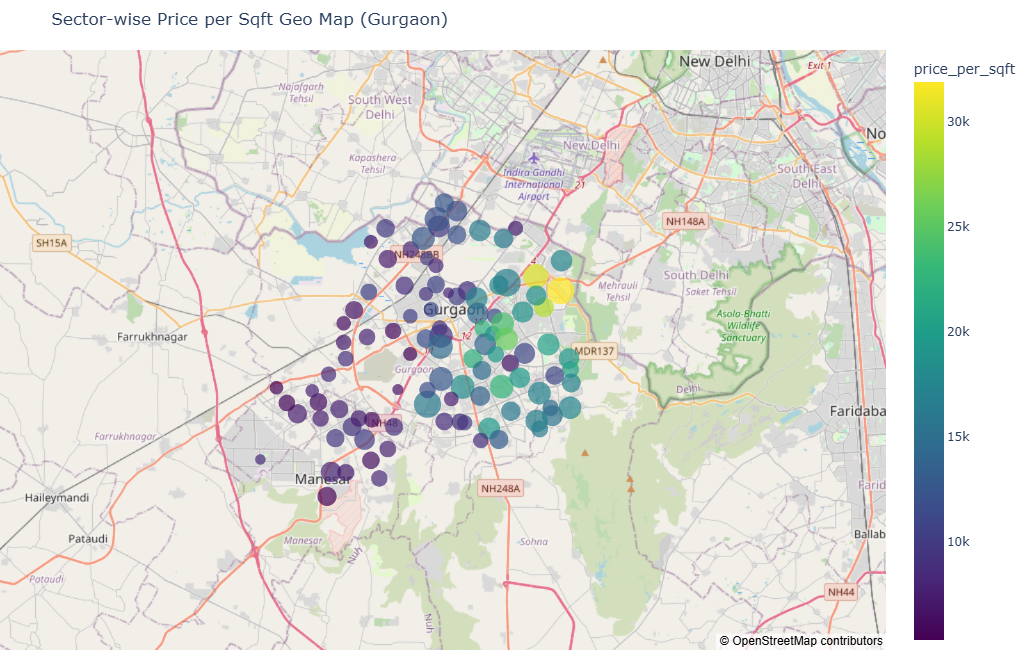

In [17]:
import plotly.express as px

fig = px.scatter_mapbox(
    group_df,
    lat="latitude",
    lon="longitude",
    color="price_per_sqft",
    size="built_up_area",
    hover_name="sector",
    hover_data={
        "price": ':.2f',
        "price_per_sqft": ':.0f',
        "built_up_area": ':.0f',
        "latitude": False,
        "longitude": False
    },
    color_continuous_scale="Viridis",
    zoom=10,
    height=650
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Sector-wise Price per Sqft Geo Map (Gurgaon)",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()        # for Jupyter
# st.plotly_chart(fig, use_container_width=True)  # for Streamlit


In [19]:
import json

with open("data/export.geojson", "r", encoding="utf-8") as f:
    geo = json.load(f)


In [20]:
len(geo["features"])

276

In [21]:
geo["features"][0]["properties"]

{'@id': 'relation/3576003',
 'admin_level': '9',
 'boundary': 'administrative',
 'name': 'Sector 26',
 'type': 'boundary'}

In [30]:
import re

clean_features = []
seen_sectors = set()

for feature in geo["features"]:
    props = feature.get("properties", {})
    name = props.get("name", "")

    if not isinstance(name, str):
        continue

    name = name.lower().strip()

    # STRICT regex: sector + number + optional letter
    match = re.fullmatch(r'(sector\s*\d+[a-z]?)', name)

    if not match:
        continue   # 🚫 discard junk like "fountain chowk to sector 40"

    sector_clean = match.group(1)
    sector_clean = sector_clean.replace("sector", "sector ").replace("  ", " ")

    # Deduplicate: keep only one polygon per sector
    if sector_clean in seen_sectors:
        continue

    seen_sectors.add(sector_clean)

    clean_features.append({
        "type": "Feature",
        "properties": {
            "sector": sector_clean
        },
        "geometry": feature["geometry"]
    })


In [34]:
sorted([f["properties"]["sector"] for f in clean_features])[:15]


['sector 1',
 'sector 10',
 'sector 100',
 'sector 101',
 'sector 102',
 'sector 102a',
 'sector 103',
 'sector 104',
 'sector 105',
 'sector 106',
 'sector 107',
 'sector 108',
 'sector 109',
 'sector 11',
 'sector 110']

In [35]:
clean_geojson = {
    "type": "FeatureCollection",
    "features": clean_features
}

with open("data/gurugram_sectors_clean.geojson", "w", encoding="utf-8") as f:
    json.dump(clean_geojson, f, indent=2)


In [36]:
# Save
import json

clean_geojson = {
    "type": "FeatureCollection",
    "features": clean_features
}

with open("data/gurugram_sectors_clean.geojson", "w", encoding="utf-8") as f:
    json.dump(clean_geojson, f, indent=2)

# Verify sectors
geo_sectors = sorted([f["properties"]["sector"] for f in clean_features])
data_sectors = sorted(new_df["sector"].unique())

print("GeoJSON sectors:", geo_sectors[:10])
print("Data sectors:", data_sectors[:10])


GeoJSON sectors: ['sector 1', 'sector 10', 'sector 100', 'sector 101', 'sector 102', 'sector 102a', 'sector 103', 'sector 104', 'sector 105', 'sector 106']
Data sectors: ['gwal pahari', 'manesar', 'sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105', 'sector 106', 'sector 107', 'sector 108']


In [37]:
sector_stats = (
    new_df
    .groupby("sector", as_index=False)
    .agg(
        avg_price=("price", "mean"),
        avg_price_per_sqft=("price_per_sqft", "mean"),
        avg_area=("built_up_area", "mean"),
        listings=("price", "count")
    )
)

In [94]:
sector_stats.to_csv("website/dataset/sector_stats.csv", index=False)

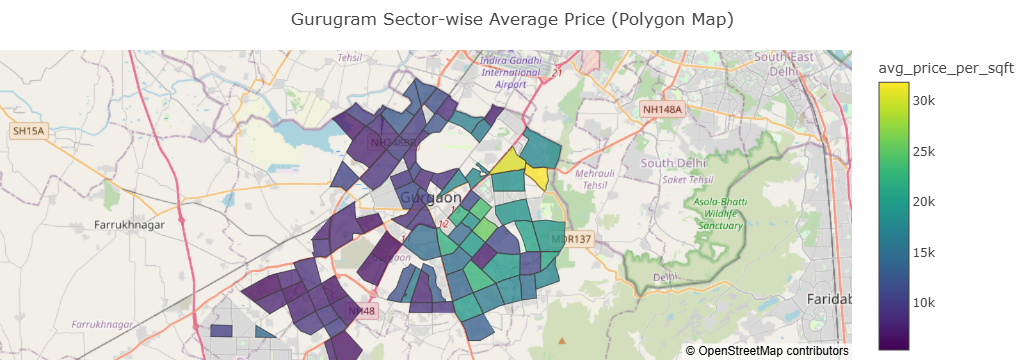

In [63]:
import plotly.express as px

fig = px.choropleth_map(
    sector_stats,
    geojson=clean_geojson,
    locations="sector",
    featureidkey="properties.sector",
    color="avg_price_per_sqft",
    color_continuous_scale="Viridis",
    map_style="open-street-map",
    zoom=10,
    center={"lat": 28.4595, "lon": 77.0266},
    opacity=0.75,
    hover_name="sector",
    hover_data={
        "avg_price": ':.2f',
        "avg_price_per_sqft": ':.0f',
        "avg_area": ':.0f',
        "listings": True
    },
    title="Gurugram Sector-wise Average Price (Polygon Map)"
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [74]:
feature = pd.read_csv('data/gurgaon_properties.csv')

In [75]:
wordcloud_df = feature.merge(df, left_index=True, right_index=True)[['features','sector']]

In [76]:
wordcloud_df.head()

,features,sector
0,"['Centrally Air Conditioned', 'Water purifier'...",sector 86
1,"['Centrally Air Conditioned', 'Water purifier'...",sector 85
2,"['Feng Shui / Vaastu Compliant', 'Park', 'Rain...",sector 57
3,"['Security / Fire Alarm', 'Intercom Facility',...",sector 82
4,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 7


In [77]:
wordcloud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   features  2575 non-null   object
 1   sector    3142 non-null   object
dtypes: object(2)
memory usage: 73.6+ KB


In [78]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [96]:
# main

In [80]:
from wordcloud import WordCloud

In [81]:
feature_text = ' '.join(main)

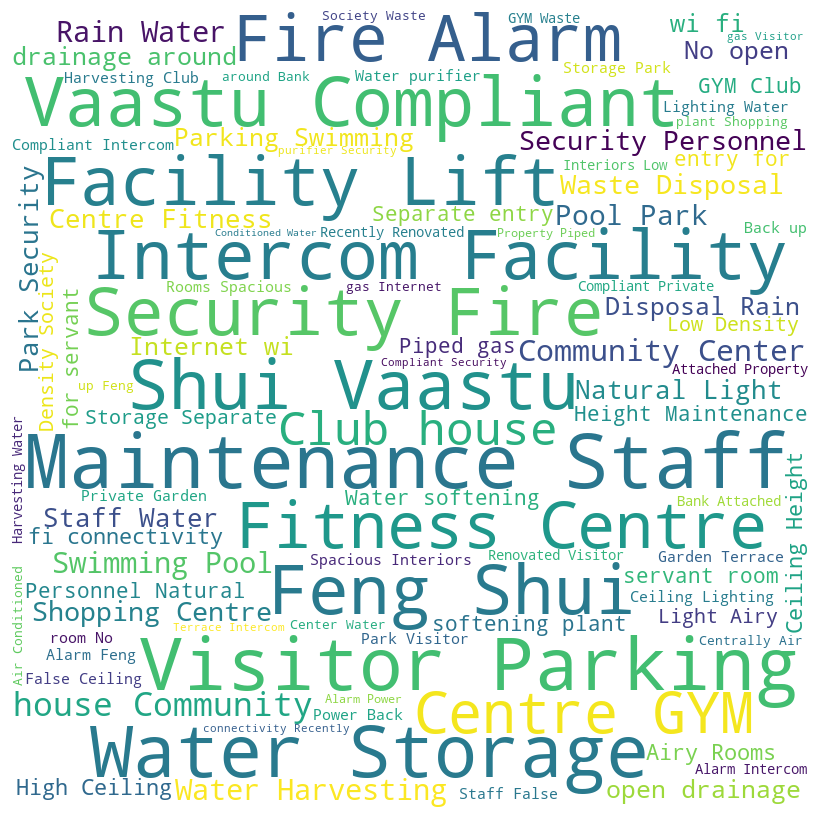

In [82]:
plt.rcParams["font.family"] = "Arial"
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = set(['s']), # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() # st.pyplot()

In [92]:
import joblib

In [93]:
with open('website/dataset/feature_text.pkl', 'wb') as file:
    joblib.dump(feature_text, file)

In [97]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,dlf the skycourt,sector 86,1.58,8191.0,3,3,1,16.0,Relatively New,...,0,0,0,1,0,2,152,"28.3986° N, 76.9384° E",28.3986,76.9384
1,flat,ss the leaf,sector 85,1.20,7317.0,2,2,3,12.0,Relatively New,...,0,0,0,0,0,2,157,"28.4042° N, 76.9513° E",28.4042,76.9513
2,house,ansals florence villa,sector 57,6.00,22222.0,4,5,2,2.0,Old Property,...,0,1,0,1,0,2,20,"28.4232° N, 77.0752° E",28.4232,77.0752
3,flat,vatika the seven lamps,sector 82,0.86,6022.0,2,2,2,12.0,Relatively New,...,1,0,0,0,0,2,135,"28.3935° N, 76.9600° E",28.3935,76.9600
4,house,independent,sector 7,0.45,5000.0,3,2,1,2.0,Old Property,...,0,0,0,0,1,0,12,"28.4644° N, 77.0143° E",28.4644,77.0143


In [ ]:
new_latlong

In [98]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3142 non-null   object 
 1   society          3142 non-null   object 
 2   sector           3142 non-null   object 
 3   price            3142 non-null   float64
 4   price_per_sqft   3142 non-null   float64
 5   bedRoom          3142 non-null   int64  
 6   bathroom         3142 non-null   int64  
 7   balcony          3142 non-null   object 
 8   floorNum         3142 non-null   float64
 9   agePossession    3142 non-null   object 
 10  built_up_area    3142 non-null   float64
 11  study room       3142 non-null   int64  
 12  servant room     3142 non-null   int64  
 13  store room       3142 non-null   int64  
 14  pooja room       3142 non-null   int64  
 15  others           3142 non-null   int64  
 16  furnishing_type  3142 non-null   int64  
 17  luxury_score  